In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('RELIANCE.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14
1,1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14
2,2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14
3,3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14
4,4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5306 non-null   int64  
 1   Date        5306 non-null   object 
 2   Symbol      5306 non-null   object 
 3   Series      5306 non-null   object 
 4   Prev Close  5306 non-null   float64
 5   Open        5306 non-null   float64
 6   High        5306 non-null   float64
 7   Low         5306 non-null   float64
 8   Last        5306 non-null   float64
 9   Close       5306 non-null   float64
 10  VWAP        5306 non-null   float64
 11  Volume      5306 non-null   int64  
 12  Turnover    5306 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 539.0+ KB


In [5]:
df.describe()

,Unnamed: 0,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,2652.500000,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076715e+14
std,1531.854595,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.369739e+14
min,0.000000,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12
25%,1326.250000,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203354e+14
50%,2652.500000,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.662999e+14
75%,3978.750000,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656490e+14
max,5305.000000,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16


In [6]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

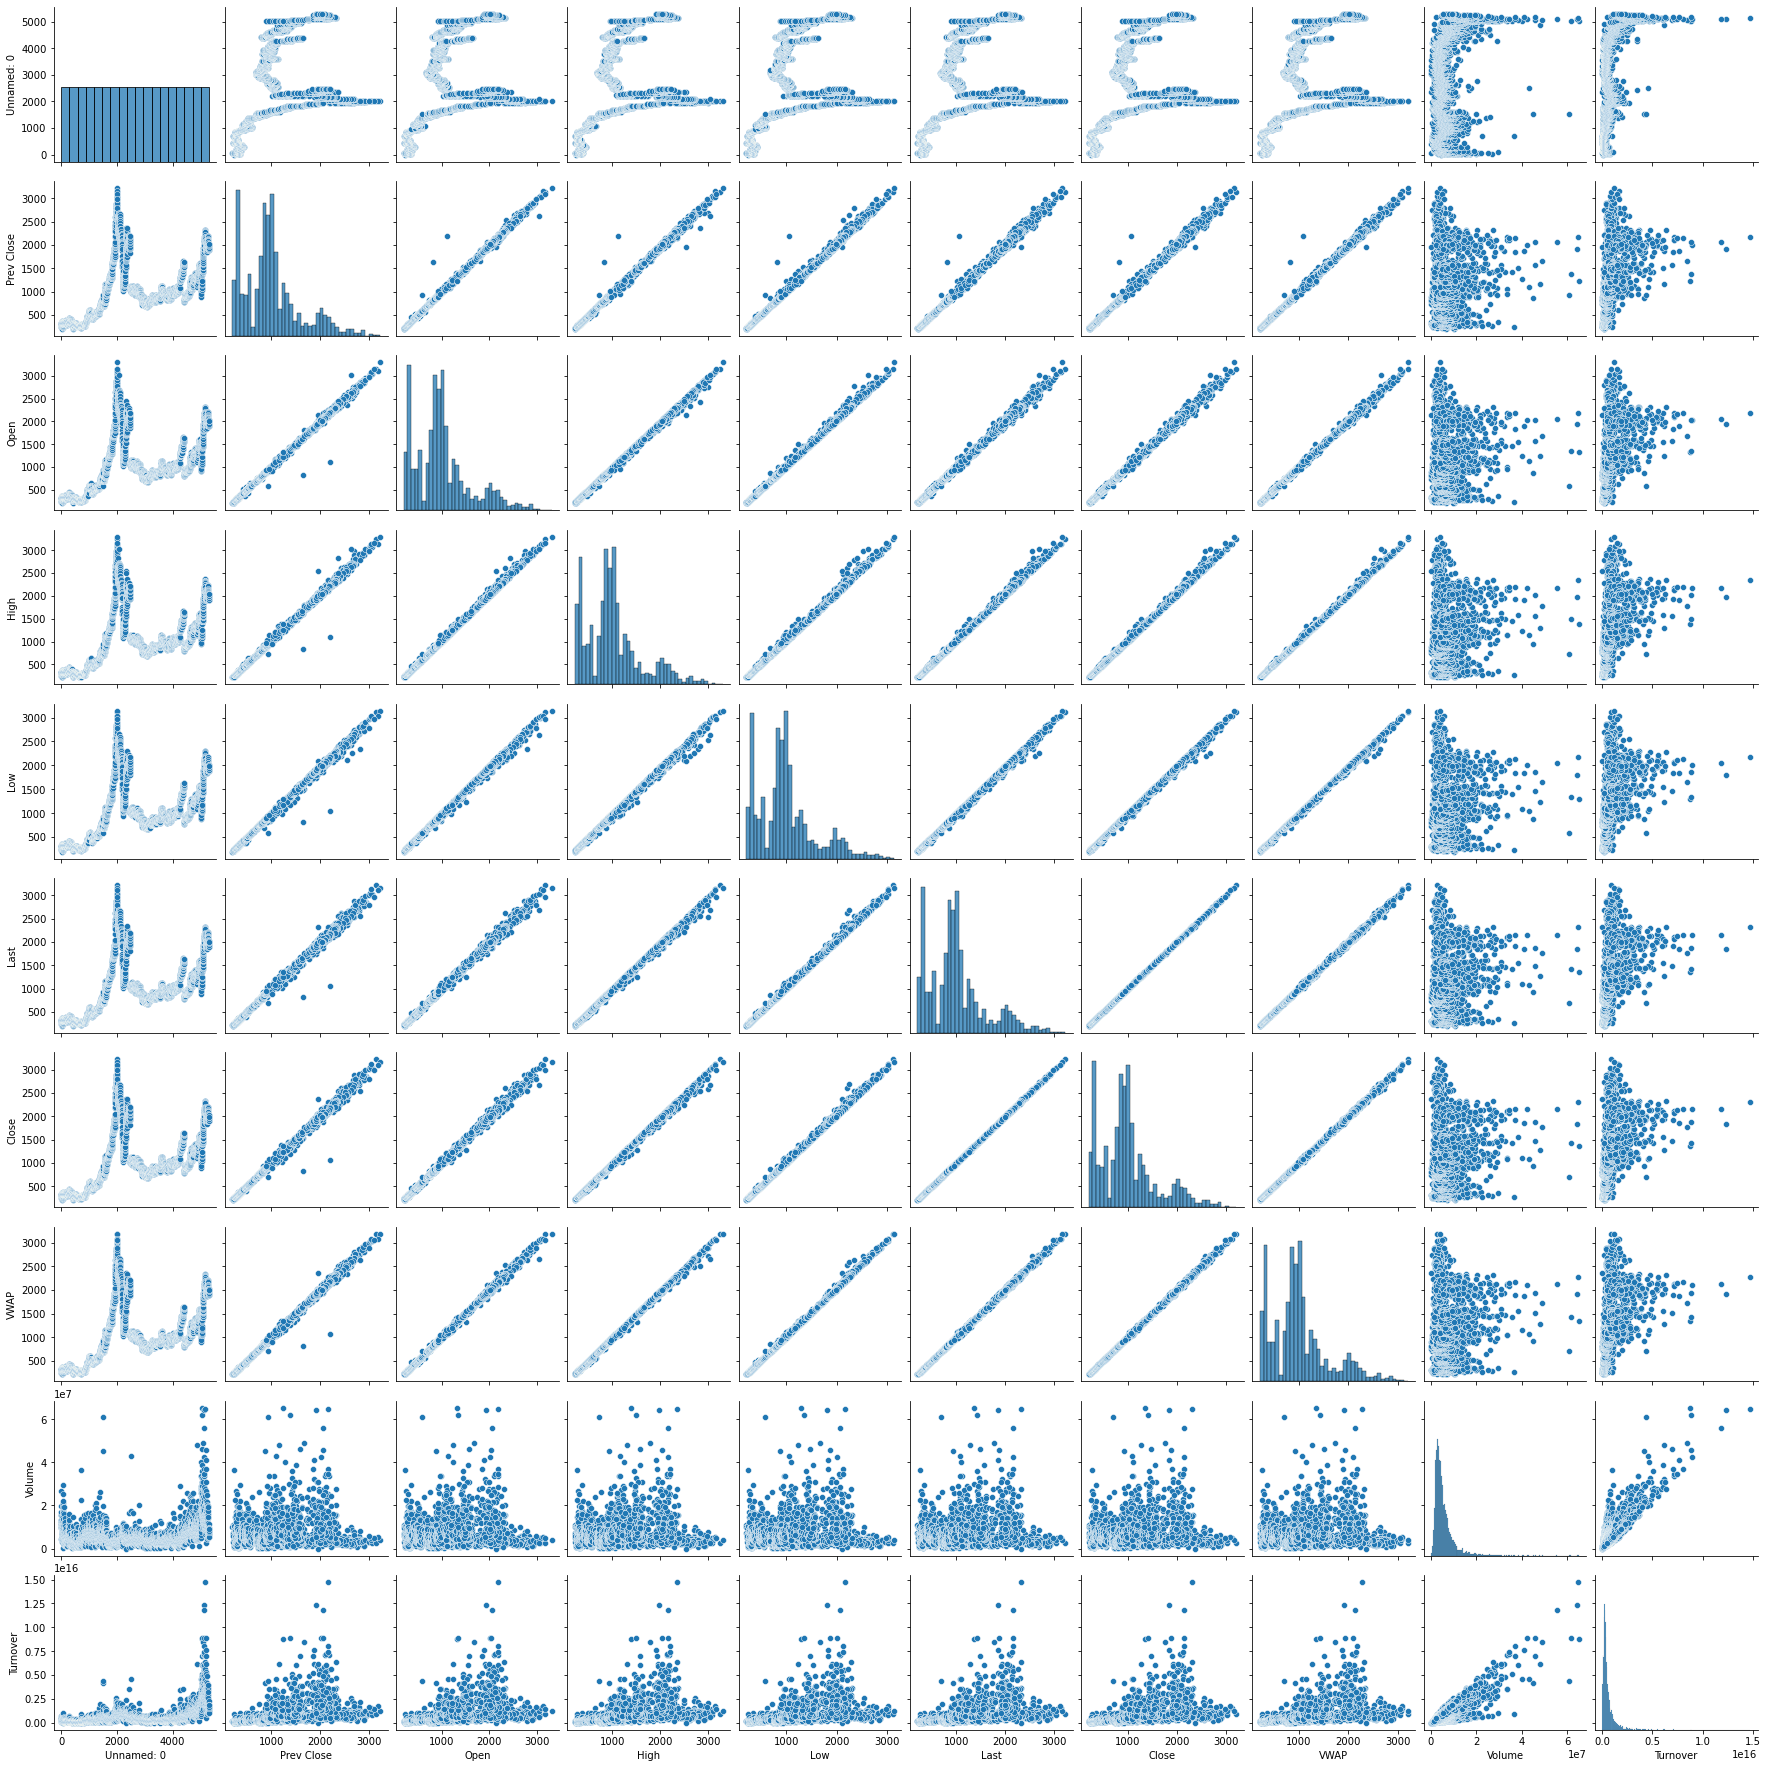

In [7]:
sns.pairplot(df)

In [15]:
y=df['Close']
X=df[['Prev Close','Open','High','Low','Last','VWAP','Volume']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-8.90413892e-03 -4.48067636e-02  3.80099378e-02  2.11521751e-02
  8.13683797e-01  1.80732255e-01 -5.98637204e-08]


In [22]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

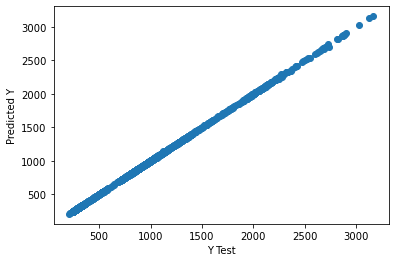

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.780193551041327
MSE: 9.579947885784309
RMSE: 3.095149089427569


C:\Users\jeet5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


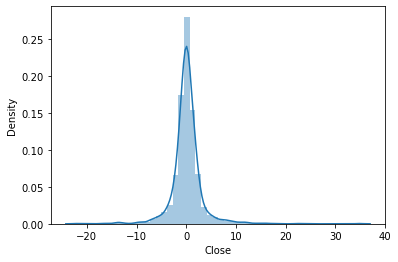

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Prev Close,-8.904139e-03
Open,-4.480676e-02
High,3.800994e-02
Low,2.115218e-02
Last,8.136838e-01
VWAP,1.807323e-01
Volume,-5.986372e-08
